In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import h5py
import tensorflow_datasets as tfds


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model


In [2]:
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded 

In [3]:
class Autoencoder_3D(Model):
  def __init__(self, latent_dim):
    super(Autoencoder_3D, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(12288, activation='sigmoid'),
      layers.Reshape((64, 64,3))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded 

In [4]:
def train_plot():   
    n = 8
    plt.figure(figsize=(10, 20))
    #plt.grid(column=4,raw=4)
    for i in range(n):
      # display original
      ax = plt.subplot(8, 4, i + 1)
      plt.imshow(x_train[i])
      plt.title("original")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(8, 4, i + 1 + n)
      plt.imshow(decoded_imgs_t[i])
      plt.title("reconstructed")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.show()

In [5]:
def train_plot_3D():   
    n = 8
    plt.figure(figsize=(10, 20))
    #plt.grid(column=4,raw=4)
    for i in range(n):
      # display original
      ax = plt.subplot(8, 4, i + 1)
      plt.imshow(train[i])
      plt.title("original")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(8, 4, i + 1 + n)
      plt.imshow(decoded_imgs_t[i])
      plt.title("reconstructed")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.show()

In [6]:
def test_plot():
    n = 8
    plt.figure(figsize=(10, 20))
    #plt.grid(column=4,raw=4)
    for i in range(n):
      # display original
      ax = plt.subplot(8, 4, i + 1)
      plt.imshow(x_test[i])
      plt.title("original")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(8, 4, i + 1 + n)
      plt.imshow(decoded_imgs[i])
      plt.title("reconstructed")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.show()

In [7]:
def test_plot_3D():
    n = 8
    plt.figure(figsize=(10, 20))
    #plt.grid(column=4,raw=4)
    for i in range(n):
      # display original
      ax = plt.subplot(8, 4, i + 1)
      plt.imshow(test[i])
      plt.title("original")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(8, 4, i + 1 + n)
      plt.imshow(decoded_imgs[i])
      plt.title("reconstructed")
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.show()

In [8]:
def plot_MSE_loss_result(loss,val_loss):         
    plt.figure()
    plt.title('mean square error(epochs-loss)',fontsize=18)
    epochs=[0,1,2,3,4,5,6,7,8,9]
    plt.plot(epochs, loss, 'c', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
        
    plt.show()

In [9]:
def plot_L1_loss_result(loss,val_loss):         
    plt.figure()
    plt.title('L1 error(epochs-loss)',fontsize=18)
    epochs=[0,1,2,3,4,5,6,7,8,9]
    plt.plot(epochs, loss, 'c', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
        
    plt.show()

In [10]:
#mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0602 - val_loss: 0.0321
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0256 - val_loss: 0.0198
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0172 - val_loss: 0.0143
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0129 - val_loss: 0.0111
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0103 - val_loss: 0.0090
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0085 - val_loss: 0.0076
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0073 - val_loss: 0.0066
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0064 - val_loss: 0.0059
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0054 - val_loss: 0.0051

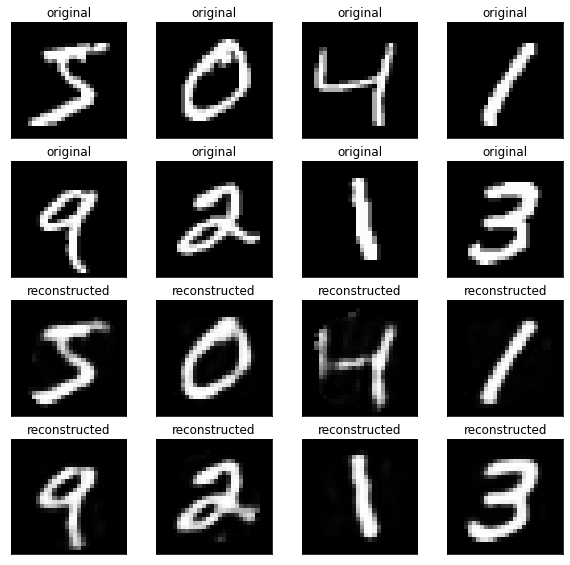

******Testing Data******


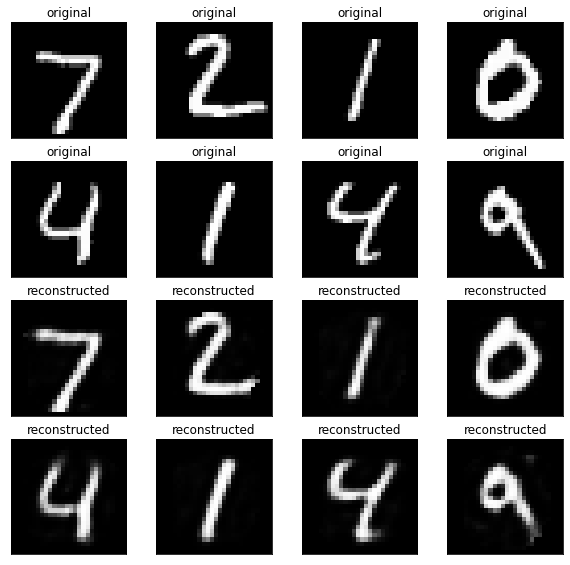

 
******loss******


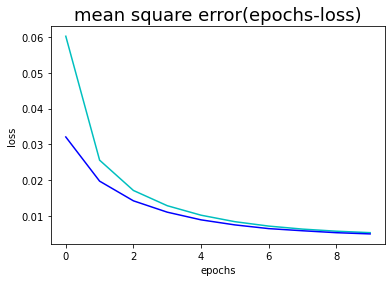

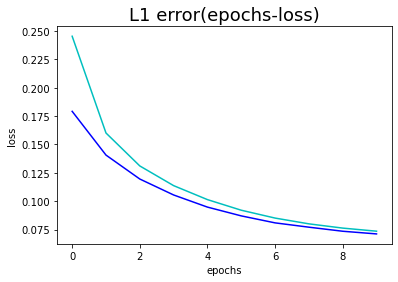

In [11]:
#latent_dim = 64 
autoencoder = Autoencoder(64)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs_t = autoencoder.encoder(x_train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot()
print("******Testing Data******")
test_plot()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

Epoch 1/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0703 - val_loss: 0.0413
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0347 - val_loss: 0.0288
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0260 - val_loss: 0.0228
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0212 - val_loss: 0.0190
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0181 - val_loss: 0.0166
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0160 - val_loss: 0.0147
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0144 - val_loss: 0.0134
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0132 - val_loss: 0.0125
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0123 - val_loss: 0.0116
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0117 - val_loss: 0.0111

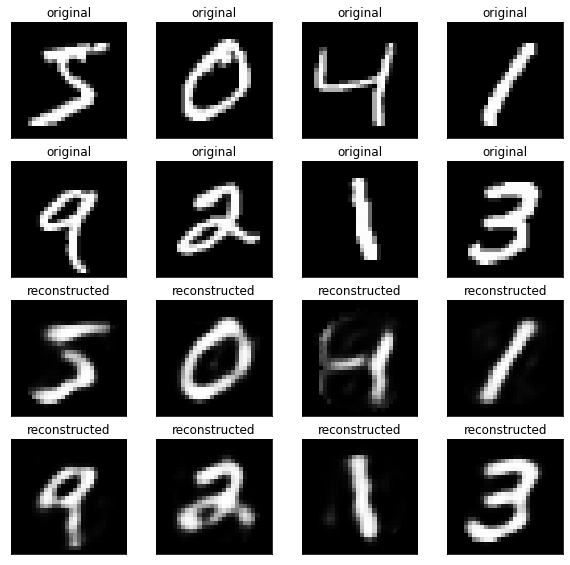

******Testing Data******


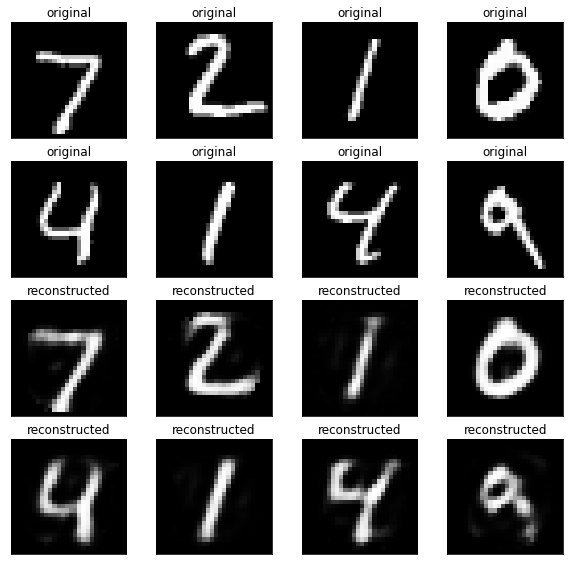

 
******loss******


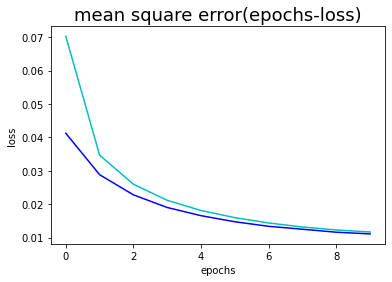

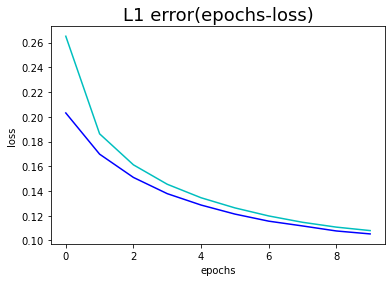

In [12]:
#latent_dim = 32
autoencoder = Autoencoder(32)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs_t = autoencoder.encoder(x_train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot()
print("******Testing Data******")
test_plot()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0612 - val_loss: 0.0502
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0493 - val_loss: 0.0481
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0479 - val_loss: 0.0472
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0473 - val_loss: 0.0467
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0469 - val_loss: 0.0465
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0468 - val_loss: 0.0464
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0466 - val_loss: 0.0463
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0466 - val_loss: 0.0462
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0465 - val_loss: 0.0461
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.046

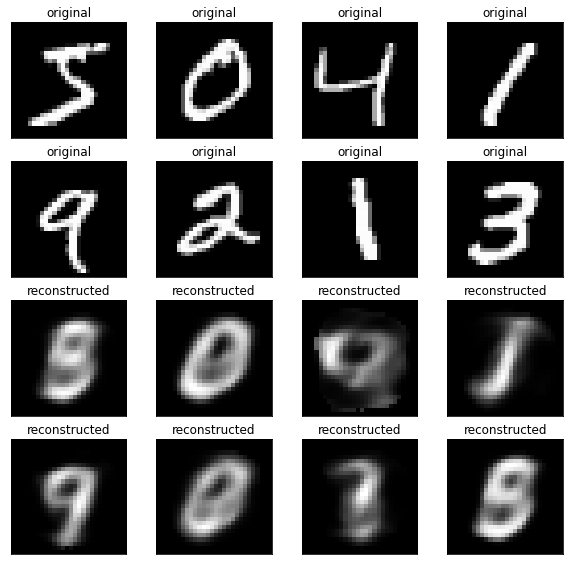

******Testing Data******


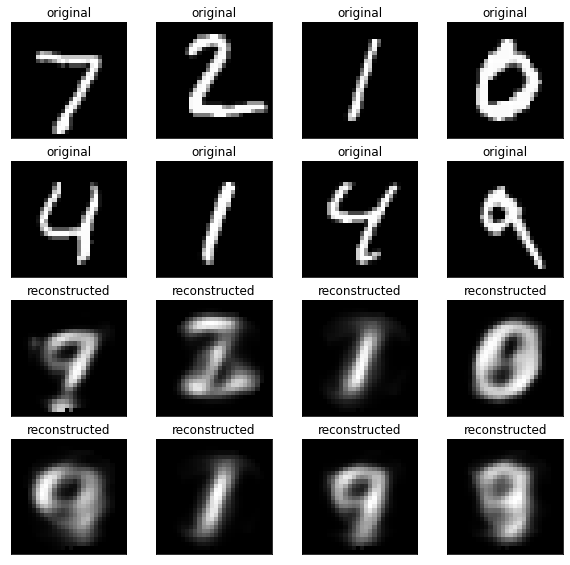

 
******loss******


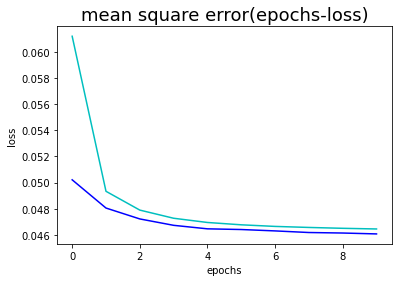

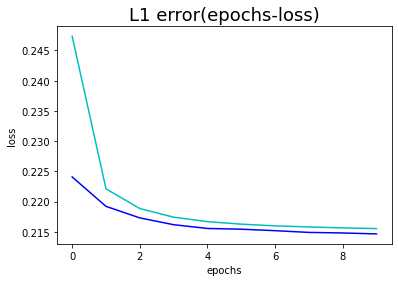

In [13]:
#latent_dim = 4 
autoencoder = Autoencoder(4)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(x_train, x_train,
                epochs=10,
                #batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs_t = autoencoder.encoder(x_train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot()
print("******Testing Data******")
test_plot()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

In [14]:
#fashion_mnist
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0237 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0116 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

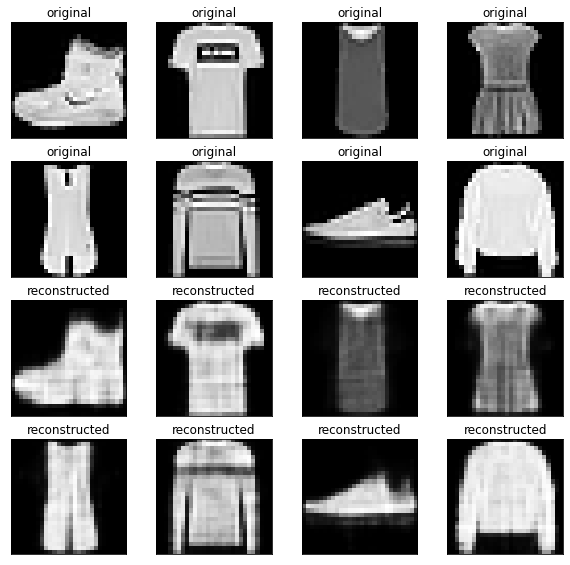

******Testing Data******


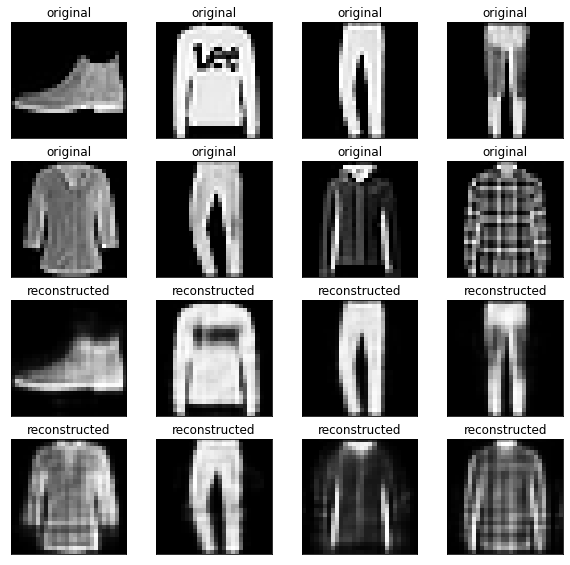

 
******loss******


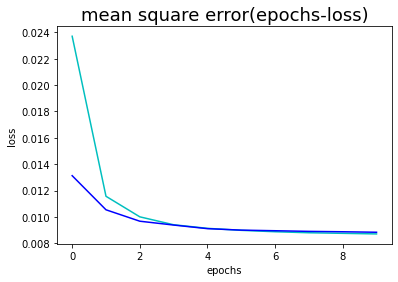

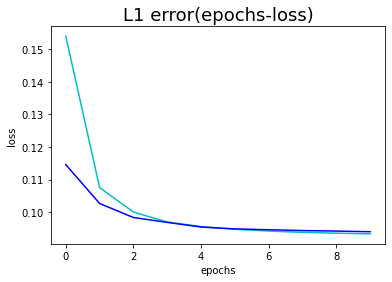

In [15]:
#latent_dim = 64 
autoencoder = Autoencoder(64)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs_t = autoencoder.encoder(x_train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot()
print("******Testing Data******")
test_plot()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0286 - val_loss: 0.0170
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0152 - val_loss: 0.0144
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0136 - val_loss: 0.0134
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0132 - val_loss: 0.0131
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0130 - val_loss: 0.0132
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0128 - val_loss: 0.0129
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0128 - val_loss: 0.0128
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0127 - val_loss: 0.0127
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0126 - val_loss: 0.0128
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.012

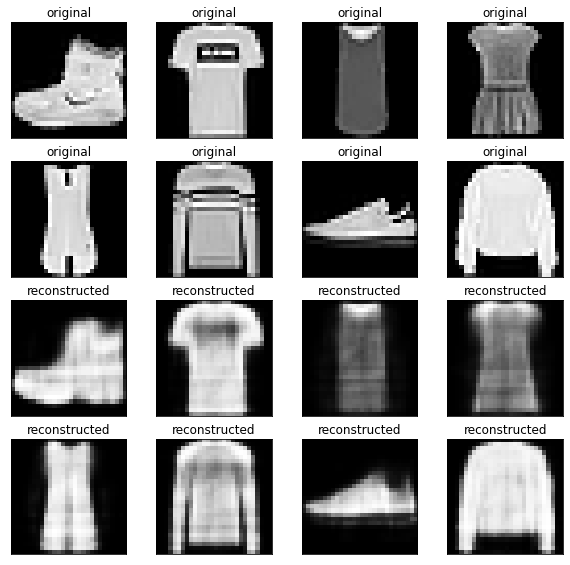

******Testing Data******


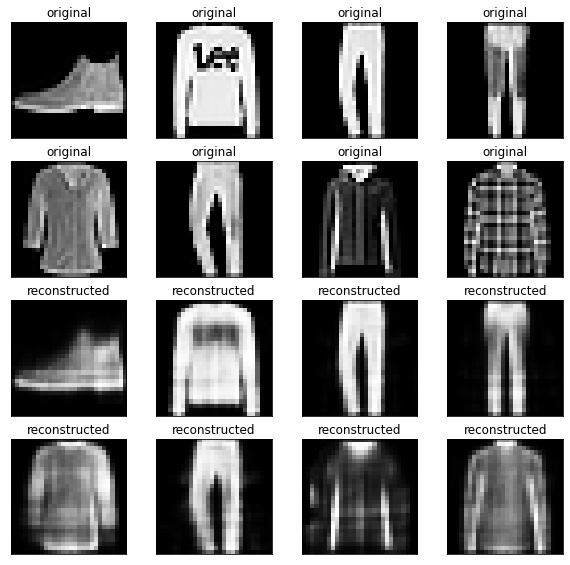

 
******loss******


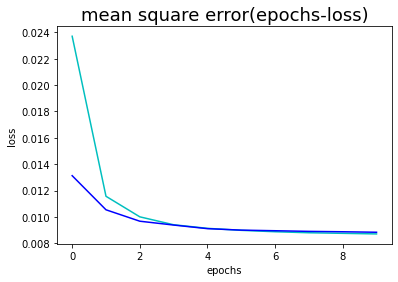

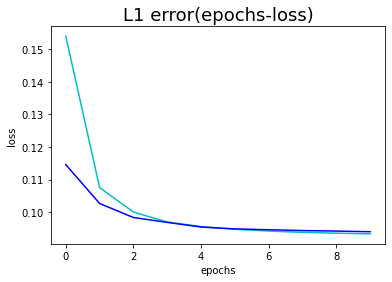

In [16]:
#latent_dim = 32
autoencoder = Autoencoder(32)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs_t = autoencoder.encoder(x_train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot()
print("******Testing Data******")
test_plot()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0520 - val_loss: 0.0372
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0350 - val_loss: 0.0335
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0332 - val_loss: 0.0328
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0327 - val_loss: 0.0326
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0326 - val_loss: 0.0325
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0325 - val_loss: 0.0324
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0324 - val_loss: 0.0323
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0324 - val_loss: 0.0324
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0324 - val_loss: 0.0323
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.032

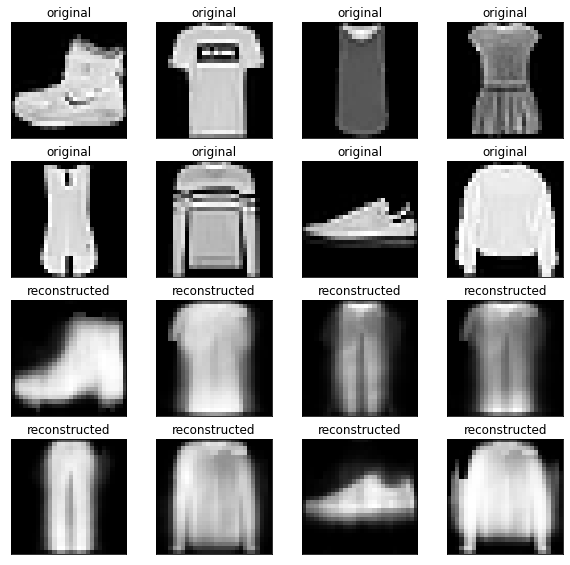

******Testing Data******


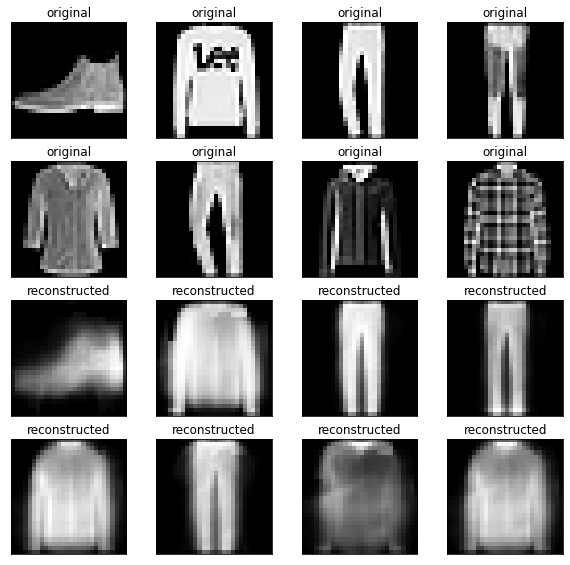

 
******loss******


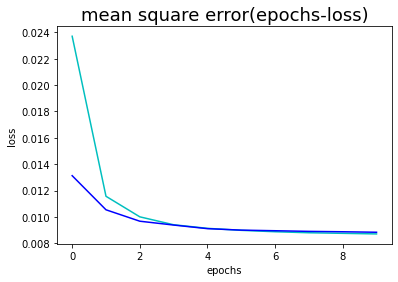

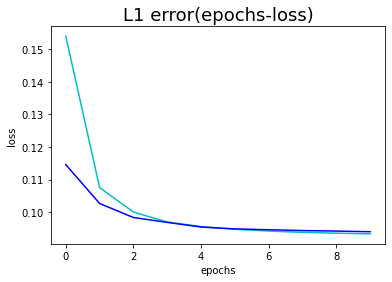

In [17]:
#latent_dim = 4
autoencoder = Autoencoder(4)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs_t = autoencoder.encoder(x_train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot()
print("******Testing Data******")
test_plot()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

In [18]:
# 3d shape 
train_ds = tfds.load('shapes3d', split='train')
train=[]
test=[]

In [19]:
print(type(train_ds))
for i ,j in enumerate(train_ds):
    if i <24000:
        train.append(j['image'])
    elif i <48000 and i>=24000:
        test.append(j['image'])
    

train=np.array(train)
test=np.array(test)


<class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>


In [20]:
print(train.shape)
print(test.shape)

(24000, 64, 64, 3)
(24000, 64, 64, 3)


Epoch 1/10
750/750 [==============================] - 21s 28ms/step - loss: 30317.6055 - val_loss: 30300.9648
Epoch 2/10
750/750 [==============================] - 21s 28ms/step - loss: 30316.8320 - val_loss: 30300.9648
Epoch 3/10
750/750 [==============================] - 21s 28ms/step - loss: 30316.8105 - val_loss: 30300.9648
Epoch 4/10
750/750 [==============================] - 21s 27ms/step - loss: 30316.8242 - val_loss: 30300.9648
Epoch 5/10
750/750 [==============================] - 20s 27ms/step - loss: 30316.8105 - val_loss: 30300.9414
Epoch 6/10
750/750 [==============================] - 20s 27ms/step - loss: 30316.7793 - val_loss: 30300.9277
Epoch 7/10
750/750 [==============================] - 20s 27ms/step - loss: 30316.7734 - val_loss: 30300.9277
Epoch 8/10
750/750 [==============================] - 20s 27ms/step - loss: 30316.7793 - val_loss: 30300.9277
Epoch 9/10
750/750 [==============================] - 21s 28ms/step - loss: 30316.7832 - val_loss: 30300.9277
Epoch 10/1

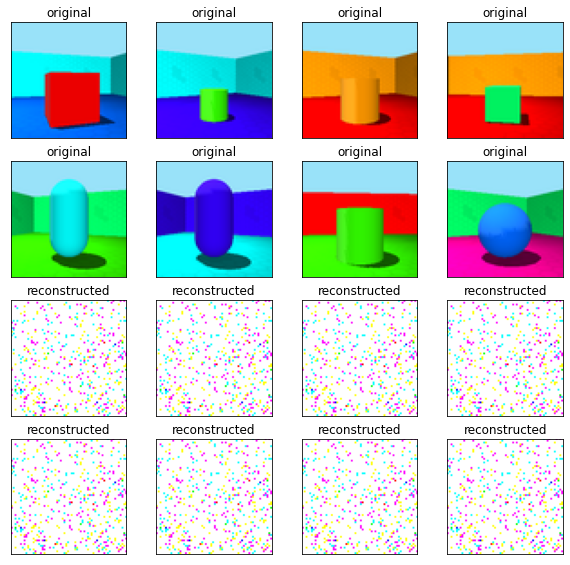

******Testing Data******


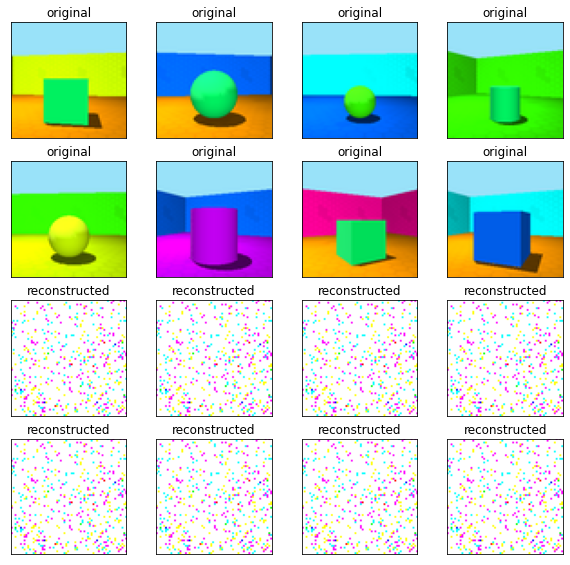

 
******loss******


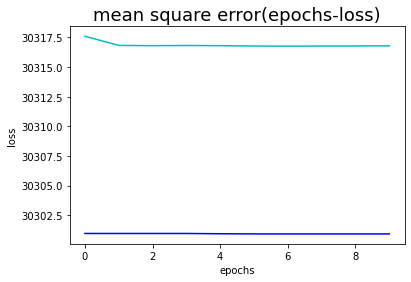

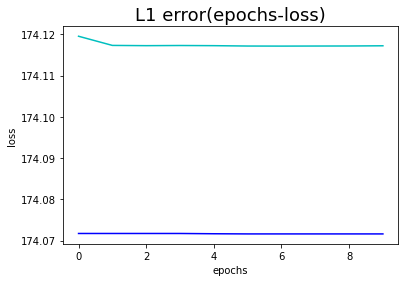

In [21]:
#latent_dim = 64 
autoencoder = Autoencoder_3D(64)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(train, train,
                epochs=10,
                shuffle=True,
                validation_data=(test, test))
encoded_imgs_t = autoencoder.encoder(train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot_3D()
print("******Testing Data******")
test_plot_3D()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

Epoch 1/10
750/750 [==============================] - 15s 21ms/step - loss: 30318.8184 - val_loss: 30301.7246
Epoch 2/10
750/750 [==============================] - 15s 20ms/step - loss: 30317.5938 - val_loss: 30301.7246
Epoch 3/10
750/750 [==============================] - 16s 21ms/step - loss: 30317.5781 - val_loss: 30301.7246
Epoch 4/10
750/750 [==============================] - 15s 20ms/step - loss: 30317.5703 - val_loss: 30301.7246
Epoch 5/10
750/750 [==============================] - 15s 20ms/step - loss: 30317.6152 - val_loss: 30301.7246
Epoch 6/10
750/750 [==============================] - 15s 20ms/step - loss: 30317.5898 - val_loss: 30301.7246
Epoch 7/10
750/750 [==============================] - 15s 20ms/step - loss: 30317.5840 - val_loss: 30301.7246
Epoch 8/10
750/750 [==============================] - 16s 21ms/step - loss: 30317.6055 - val_loss: 30301.7246
Epoch 9/10
750/750 [==============================] - 16s 21ms/step - loss: 30317.5781 - val_loss: 30301.7246
Epoch 10/1

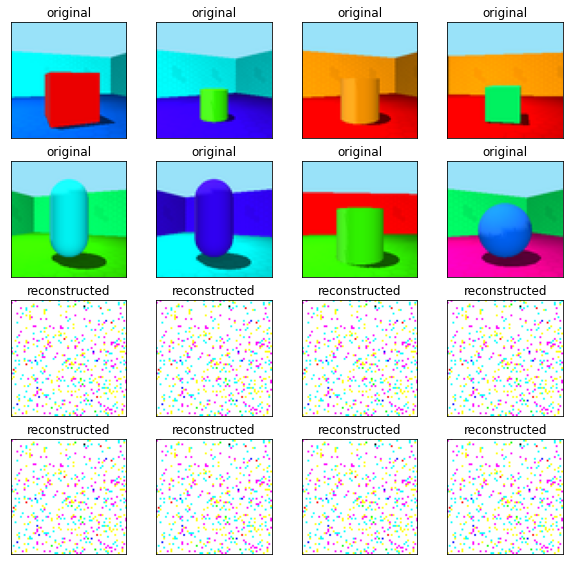

******Testing Data******


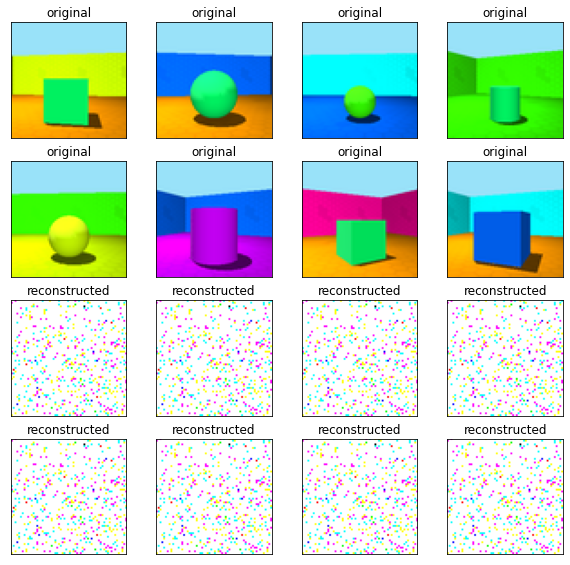

 
******loss******


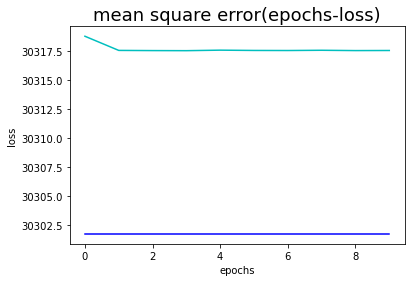

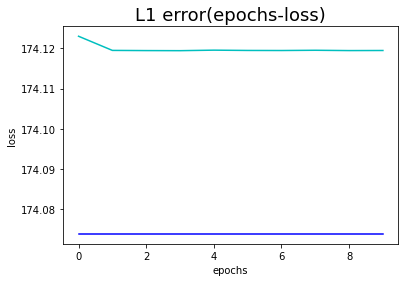

In [22]:
#latent_dim = 32
autoencoder = Autoencoder_3D(32)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(train, train,
                epochs=10,
                shuffle=True,
                validation_data=(test, test))
encoded_imgs_t = autoencoder.encoder(train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot_3D()
print("******Testing Data******")
test_plot_3D()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))

Epoch 1/10
750/750 [==============================] - 11s 15ms/step - loss: 30398.5527 - val_loss: 30381.2422
Epoch 2/10
750/750 [==============================] - 11s 15ms/step - loss: 30396.9863 - val_loss: 30380.9395
Epoch 3/10
750/750 [==============================] - 11s 15ms/step - loss: 30396.6211 - val_loss: 30380.5605
Epoch 4/10
750/750 [==============================] - 11s 15ms/step - loss: 30396.1875 - val_loss: 30380.1680
Epoch 5/10
750/750 [==============================] - 11s 15ms/step - loss: 30395.7891 - val_loss: 30379.6582
Epoch 6/10
750/750 [==============================] - 11s 15ms/step - loss: 30395.3301 - val_loss: 30379.2695
Epoch 7/10
750/750 [==============================] - 11s 15ms/step - loss: 30395.1074 - val_loss: 30379.1191
Epoch 8/10
750/750 [==============================] - 11s 15ms/step - loss: 30394.8223 - val_loss: 30378.7168
Epoch 9/10
750/750 [==============================] - 10s 14ms/step - loss: 30322.3203 - val_loss: 30289.7441
Epoch 10/1

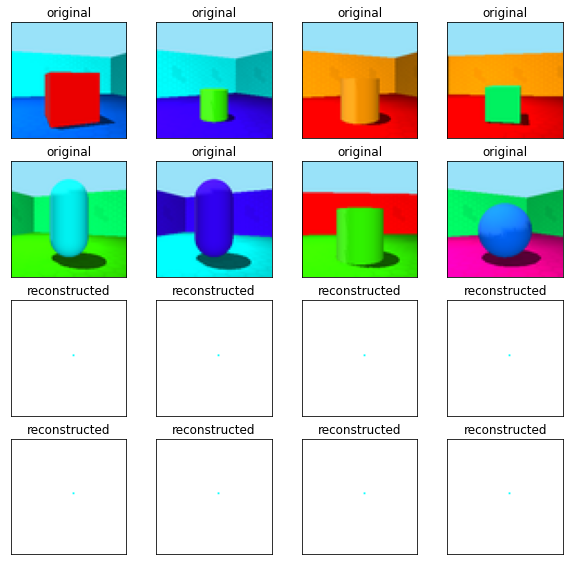

******Testing Data******


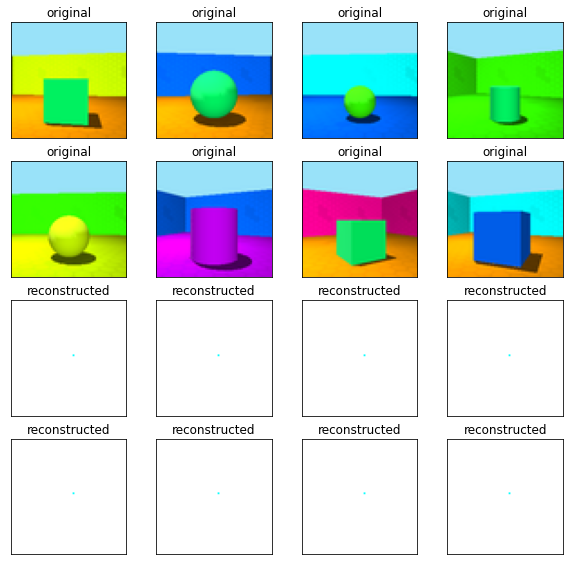

 
******loss******


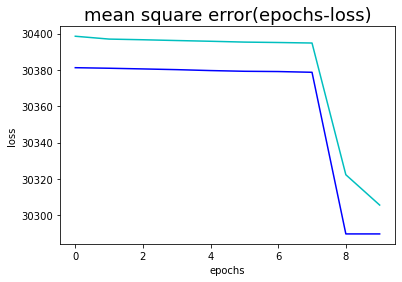

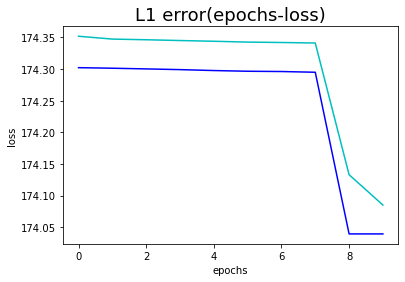

In [23]:
#latent_dim = 4
autoencoder = Autoencoder_3D(4)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
loss_history =autoencoder.fit(train, train,
                epochs=10,
                shuffle=True,
                validation_data=(test, test))
encoded_imgs_t = autoencoder.encoder(train).numpy()
decoded_imgs_t = autoencoder.decoder(encoded_imgs_t).numpy()
encoded_imgs = autoencoder.encoder(test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(" ")
print("******Training Data******")
train_plot_3D()
print("******Testing Data******")
test_plot_3D()
print(" ")
print("******loss******")
plot_MSE_loss_result(loss_history.history['loss'],loss_history.history['val_loss'])
plot_L1_loss_result(np.sqrt(loss_history.history['loss']),np.sqrt(loss_history.history['val_loss']))